In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, ttest_ind

# Teste de Hipótese

Digamos que temos um detector de spam, que determina se dado email é spam ou ham. Por padrão vamos assumir que todos os emails são ham, a razão para isso é que é muito pior excluir um bom email do que colocar acidentalmente um email spam na caixa de entrada. Isso será chamado de hipótse nula, ou H0.

E temos uma hipótese alternativa chamada H1, que é a hipótese que queremos provar. Neste caso, a hipótese alternativa é que o email é spam.

Ambas hipóteses são mutuamente exclusivas, ou seja, se uma é verdadeira, a outra é falsa.

Se as evidências coletadas não forem o suficiente para mostrar que o email é spam podemos rejeitar a hipótese nula, no entanto isso não significa que o email seja ham, apenas que não temos evidências suficientes para provar é spam.

Então começamos propondo nossa hipótese, a hipótese nula é que o email é ham, e a hipótese alternativa é que o email é spam. E o objetivo do teste é decidir entre duas hipóteses com base em dados e evidências. No caso do exemplo de spam as evidências seriam o remetente, os anexos, o tamanho do email, palavras chave, etc. Qualquer coisa que pode ser usada pra demonstrar que o email é spam.

Intuitivamente se sua amostra fornecer muitas evidências contra H0, você rejeitará a hipótese nula e aceitará a hipótese alternativa. Neste caso as evidências baseadas em dados seriam palavras ou frases diferentes no email. Então suponha que você recebeu um email com frases do tipo:

In [1]:
# Lista de palavras-chave comumente encontradas em spam
spam_keywords = ['earn extra cash', 'risk free', 'dear friend', 'act immediately', 'apply now', 'winner']

Todas essas frases são gatilhos para detectar spam. Na verdade é muito provável que essas frases apareçam se o email não for spam, que é a hipótese nula sob a hipótese de que é um email normal. Nesse caso você rejeitaria H0 e enviaria o email para spam.

In [1]:
# Função para simular o teste de um email
def is_spam(email_content):  
    # Contando quantas palavras-chave de spam estão no email
    keyword_count = sum(keyword in email_content.lower() for keyword in spam_keywords)
    
    # Critério: se mais de duas palavras-chave de spam estiverem presentes, consideramos como spam
    if keyword_count > 2:
        print("Rejeita Hipótese Nula: O email é spam.")
    else:
        print("Não rejeita Hipótese Nula: O email é ham.")

# Testando a função com um exemplo de email
sample_email = "Hello dear friend, you have been selected as a winner! Act immediately to claim your prize."
is_spam(sample_email)

Rejeita Hipótese Nula: O email é spam.


# Type I and Type II errors

Idealmente gostariamos de sempre tomar as decisões perfeitas, mas infelizmente isso é impossível de garantir devido à aleatoriedade do mundo e ao fato de termos apenas informações parciais da população em estudo. Então e se eu fizer a decisão errada?

Existem dois resultados possíveis para o teste, ou você envia o email para a caixa de spam ou para a caixa de entrada normal. Cada um desses resultados pode estar errado, no primeiro caso (Type 1 error) você envia um email normal para a caixa de spam que seria o falso positivo e acontece quando você rejeita H0 quando na verdade era verdadeira. No segundo caso (Type 2 error) você envia um email spam para a caixa de entrada normal que seria o falso negativo e acontece quando você aceita H0 quando na verdade era falsa.

É importante entender que você nunca saberá se está certo ou errado sobre sua decisão porque não conhece a verdadeira natureza do email. No entanto, você fará o possível para determinar um teste em que mantenha esses erros abaixo de um certo limite aceito. 

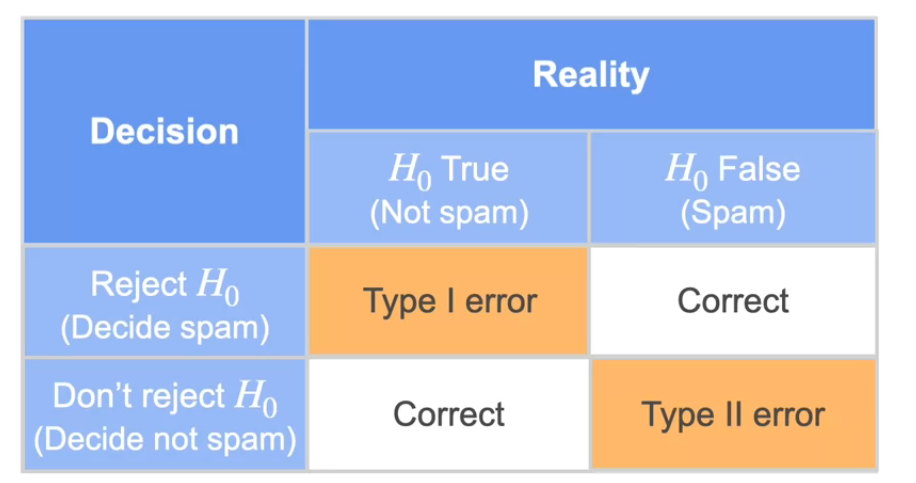

### Possíveis Resultados

1. **Erro Tipo I (Falso Positivo)**:
   - **Decisão**: Rejeitar H0 (decidir que é spam).
   - **Realidade**: H0 é verdadeira (o email não é spam).
   - **Implicação**: Um email legítimo é incorretamente marcado como spam. Este erro é grave pois pode impedir que o destinatário receba mensagens importantes.

2. **Decisão Correta (Quando H0 é Verdadeira)**:
   - **Decisão**: Não rejeitar H0 (decidir que não é spam).
   - **Realidade**: H0 é verdadeira (o email não é spam).
   - **Implicação**: A decisão está correta, e o email legítimo chega à caixa de entrada, como deveria.

3. **Decisão Correta (Quando H0 é Falsa)**:
   - **Decisão**: Rejeitar H0 (decidir que é spam).
   - **Realidade**: H0 é falsa (o email é spam).
   - **Implicação**: A decisão está correta, e o email de spam é corretamente enviado para a caixa de spam, protegendo o usuário de conteúdo potencialmente perigoso ou indesejado.

4. **Erro Tipo II (Falso Negativo)**:
   - **Decisão**: Não rejeitar H0 (decidir que não é spam).
   - **Realidade**: H0 é falsa (o email é spam).
   - **Implicação**: Um email de spam é erroneamente enviado para a caixa de entrada. Esse erro pode levar a consequências como phishing ou a disseminação de malwares, caso o usuário interaja com o email.

### Importância da Distinção
A compreensão e a diferenciação entre esses tipos de erros são cruciais para ajustar a sensibilidade do teste de hipóteses, particularmente em aplicações práticas como filtros de spam. Decidir entre um risco maior de Erros Tipo I ou Tipo II muitas vezes depende das consequências específicas desses erros no contexto em questão. Em muitos casos práticos, especialmente em filtros de spam, prefere-se errar na direção de classificar um spam como ham (erro Tipo II) do que perder um email importante devido a uma classificação incorreta como spam (erro Tipo I).

### Definição de Nível de Significância ($\alpha$)

O nível de significância $\alpha$ representa a probabilidade máxima de cometer um erro do Tipo I, ou seja, a probabilidade de rejeitar a hipótese nula quando ela é verdadeira. Em termos simples, $\alpha$ é a probabilidade de detectar um efeito quando, na realidade, ele não existe. Varia de 0 a 1.

### Como $\alpha$ é Usado em Testes de Hipóteses

- **Threshold para Decisão Estatística**: $\alpha$ define o "corte" para o valor crítico do teste estatístico. Se o valor calculado do teste estatístico excede esse valor crítico (que depende de $\alpha$), então a hipótese nula é rejeitada.
- **Balanceamento de Erros**: Ao escolher $\alpha$, o pesquisador está balanceando o risco de cometer um erro do Tipo I com a necessidade de detectar um efeito verdadeiro (se ele realmente existir). Valores comuns para $\alpha$ incluem 0.05 e 0.01, indicando um compromisso entre ser excessivamente cauteloso (evitando falsos positivos) e garantir uma detecção adequada de efeitos reais.

### Implicações Práticas de $\alpha$

- **Interpretação de $p$-values**: Em um teste de hipóteses, o $p$-value é comparado com $\alpha$ para decidir se o resultado é estatisticamente significativo. Se o $p$-value é menor que $\alpha$, então rejeitamos $H_0$; caso contrário, não rejeitamos $H_0$.
- **Confiabilidade dos Resultados**: Um $\alpha$ mais baixo significa que estamos mais confiantes de que os resultados que declaramos como significativos não são devidos ao acaso. No entanto, isso também torna mais difícil detectar um efeito verdadeiro, aumentando a probabilidade de um erro do Tipo II (não detectar um efeito quando ele existe).

#### **Equilíbrio entre $\alpha$ e os Erros:**
- **Reduzir $\alpha$** diminui a probabilidade de cometer erros do Tipo I, mas aumenta a probabilidade de erros do Tipo II. Isso é particularmente problemático em aplicações críticas onde classificar incorretamente uma entrada legítima como spam pode ter consequências graves, como a perda de informações importantes.
- **Aumentar $\alpha$** tende a reduzir a probabilidade de erros do Tipo II (menos spams passarão para a caixa de entrada), mas aumenta a chance de cometer erros do Tipo I.

### Nível de Significância ($\alpha$)

O nível de significância $\alpha$ é definido como:
$$ \alpha = P(\text{rejeitar } H_0 | H_0 \text{ é verdadeira}) $$

Essa definição significa que $\alpha$ é a probabilidade de cometer um erro Tipo I (falso positivo), onde rejeitamos a hipótese nula quando ela é, de fato, verdadeira.

### Erros Tipo I e Tipo II

- **Erro Tipo I (Falso Positivo)**: Rejeitar $H_0$ quando $H_0$ é verdadeira.
$$ P(\text{Erro Tipo I}) = P(\text{rejeitar } H_0 | H_0 \text{ é verdadeira}) = \alpha $$

- **Erro Tipo II (Falso Negativo)**: Falha em rejeitar $H_0$ quando $H_0$ é falsa. Denotado por $\beta$, onde:
$$ \beta = P(\text{não rejeitar } H_0 | H_1 \text{ é verdadeira}) $$

### Relação entre $\alpha$ e $\beta$

A escolha de $\alpha$ influencia diretamente $\beta$. Reduzir $\alpha$ tende a aumentar $\beta$, especialmente se o tamanho da amostra permanecer constante. Isso é representado pelo trade-off entre sensibilidade e especificidade:

- **Sensibilidade**: A capacidade do teste em identificar corretamente casos positivos (rejeitar $H_0$ quando $H_1$ é verdadeira).
- **Especificidade**: A capacidade do teste em identificar corretamente casos negativos (não rejeitar $H_0$ quando $H_0$ é verdadeira).

# Exemplo de estimativa da altura média de jovens de 18 anos

Os testes de hipóteses podem ser classificados em três tipos com base na natureza da hipótese alternativa ($H_1$): teste unicaudal à direita (Right-Tailed), teste unicaudal à esquerda (Left-Tailed) e teste bicaudal (Two-Tailed). A escolha do teste depende de como a hipótese alternativa é formulada em relação à hipótese nula ($H_0$).

### Teste Unicaudal à Direita (Right-Tailed)

- **Hipótese Nula ($H_0$)**: A média, proporção ou outro parâmetro estatístico é igual ou menor que um valor específico.
  - Exemplo: $H_0: \mu \leq 68$
- **Hipótese Alternativa ($H_1$)**: O parâmetro é maior que o valor na hipótese nula.
  - Exemplo: $H_1: \mu > 68$
- O teste foca em detectar um aumento ou valor mais alto do que o estipulado na $H_0$.

### Teste Unicaudal à Esquerda (Left-Tailed)

- **Hipótese Nula ($H_0$)**: O parâmetro é igual ou maior que um valor específico.
  - Exemplo: $H_0: \mu \geq 68$
- **Hipótese Alternativa ($H_1$)**: O parâmetro é menor que o valor na hipótese nula.
  - Exemplo: $H_1: \mu < 68$
- O teste é usado quando o interesse é detectar uma diminuição ou valor mais baixo do que o especificado na $H_0$.

### Teste Bicaudal (Two-Tailed)

- **Hipótese Nula ($H_0$)**: O parâmetro é igual a um valor específico.
  - Exemplo: $H_0: \mu = 68$
- **Hipótese Alternativa ($H_1$)**: O parâmetro não é igual ao valor na hipótese nula.
  - Exemplo: $H_1: \mu \neq 68$
- Este teste é usado quando as alterações podem ocorrer em duas direções, seja maior ou menor do que o valor especificado em $H_0$.

### Seleção do Tipo de Teste

A escolha entre esses três tipos de teste depende do contexto da pesquisa e da pergunta específica que está sendo testada. A direção da hipótese alternativa determina se o teste será unicaudal (à direita ou à esquerda) ou bicaudal.

### Configuração das Hipóteses Right-Tailed
- **Hipótese Nula ($H_0$)**: A média da população, $ \mu $, é menor ou igual a 66.7. Isso é geralmente expresso como $H_0: \mu \leq 66.7$.
- **Hipótese Alternativa ($H_1$)**: A média da população é maior que 66.7. Isso é expresso como $H_1: \mu > 66.7$.

Nesse contexto, você está testando se há evidências suficientes para rejeitar $H_0$ e aceitar $H_1$, com base na média amostral obtida de seus dados.

### Tipos de Erros
- **Erro Tipo I**: Ocorre quando $H_0$ é de fato verdadeira (ou seja, a média da população é realmente 66.7 ou menos), mas os resultados do teste levam à sua rejeição. Isso é semelhante a um "falso positivo", onde você conclui erroneamente que a média da população excede 66.7.
- **Erro Tipo II**: Esse erro acontece quando $H_0$ é falsa (ou seja, a média da população é maior que 66.7), mas o teste não rejeita $H_0$. Este é um cenário de "falso negativo", onde você não percebe que a média da população é realmente maior que 66.7.

### Teste Estatístico
Para realizar este teste:
1. **Calcule a Média da Amostra ($\bar{x}$)**: Se $\bar{x}$ for significativamente maior que 66.7, considere rejeitar $H_0$.
2. **Determine o Estatístico de Teste**: Normalmente um escore z ou t, dependendo de se a desvio padrão da população ($\sigma$) é conhecido.
3. **Regra de Decisão**: Usando um nível de significância (por exemplo, $\alpha = 0.05$), encontre o valor crítico nas tabelas de distribuição z ou t. Se o estatístico de teste exceder esse valor crítico, rejeite $H_0$.

In [18]:
# Dados da amostra
sample = np.array([68, 69, 70, 67, 71, 70, 72, 69, 68, 73])

# Média da amostra
sample_mean = np.mean(sample)

# Desvio padrão da amostra
sample_std = np.std(sample, ddof=1)
n = len(sample)

# Limite da hipótese nula
mu_0 = 66.7

# Calcula o t-estatístico
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
df = n - 1  # graus de liberdade

# Valor-p para teste unicaudal à direita
p_value = 1 - t.cdf(t_statistic, df)

print("Média da amostra:", sample_mean)
print(f'Estatístico t: {t_statistic:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Decisão
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média é significativamente maior que 66.7")
else:
    print("Não rejeitar H0: Não há evidências significativas de que a média seja maior que 66.7")

Média da amostra: 69.7
Estatístico t: 5.02
Valor-p: 0.0004
Rejeitar H0: A média é significativamente maior que 66.7


### Configuração das Hipóteses Left-Tailed
- **Hipótese Nula ($H_0$)**: A média da população $ \mu $ é maior ou igual a 66.7.
  - $H_0: \mu \geq 66.7$
- **Hipótese Alternativa ($H_1$)**: A média da população $ \mu $ é menor que 66.7, indicando uma diminuição ao longo dos anos.
  - $H_1: \mu < 66.7$

Nessa configuração, você testa se há evidências estatísticas significativas que sugerem que a média da população é realmente menor que 66.7, o que levaria você a rejeitar $H_0$.

### Tipos de Erros
- **Erro Tipo I**: Ocorre se você rejeitar $H_0$ quando ela é verdadeira. Na prática, isso significa que você conclui que a média da população é menor que 66.7 quando não houve uma diminuição, levando a decisões incorretas baseadas em uma suposta diminuição.
- **Erro Tipo II**: Acontece se você falhar em rejeitar $H_0$ quando $H_1$ é verdadeira. Esse erro significa que você não percebe uma diminuição real na média da população, mantendo o status quo quando mudanças podem ser necessárias.

### Teste Estatístico e Regra de Decisão
Para conduzir um teste unicaudal à esquerda:
1. **Calcular o Estatístico de Teste**: Similar aos cenários anteriores, mas com foco em detectar uma diminuição.
2. **Determinar o Valor Crítico e o Valor-p**: Para este teste à esquerda, você procura a probabilidade de observar um estatístico de teste tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira.
3. **Tomada de Decisão**: Se o estatístico de teste cair na região crítica (ou o valor-p for menor que o nível de significância $\alpha$), rejeite $H_0$. Comumente, $\alpha$ é fixado em 0.05.

In [12]:
data = np.array([65, 64, 66, 63, 65, 64, 62, 66, 63, 64])
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)

# Limite da hipótese nula
mu_0 = 66.7

# Calcula o t-estatístico
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Graus de liberdade
df = n - 1

# Valor-p para teste unicaudal à esquerda
p_value = t.cdf(t_statistic, df)

# Imprime resultados
print("Média da amostra:", sample_mean)
print(f'Estatístico t: {t_statistic:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Decisão com base em um nível de significância de 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média é significativamente menor que 66.7")
else:
    print("Não rejeitar H0: Não há evidências significativas de que a média seja menor que 66.7")

Média da amostra: 64.2
Estatístico t: -6.00
Valor-p: 0.0001
Rejeitar H0: A média é significativamente menor que 66.7


### Configuração das Hipóteses Two-Tailed
- **Hipótese Nula ($H_0$)**: A média da população $ \mu $ é igual a 66.7.
  - $H_0: \mu = 66.7$
- **Hipótese Alternativa ($H_1$)**: A média da população $ \mu $ é diferente de 66.7.
  - $H_1: \mu \neq 66.7$

Esse arranjo permite que você teste se a média da população é significativamente maior ou menor que 66.7.

### Tipos de Erros
- **Erro Tipo I**: Ocorre se você rejeitar $H_0$ quando ela é verdadeira (ou seja, a média é realmente 66.7), mas você conclui que é diferente. Esse erro é conhecido como falso positivo.
- **Erro Tipo II**: Acontece se você não rejeitar $H_0$ quando $H_1$ é verdadeira (ou seja, a média não é 66.7), mas você conclui que não há diferença. Esse erro é conhecido como falso negativo.

### Teste Estatístico e Decisão
Para um teste bicaudal:
1. **Calcular o Estatístico de Teste**: Similar aos outros testes, mas você usará o valor absoluto da diferença entre a média da amostra e a média hipotetizada.
   $$ t = \frac{|\bar{x} - \mu_0|}{s/\sqrt{n}} $$
   Onde $ \bar{x} $ é a média da amostra, $ s $ é o desvio padrão da amostra, e $ n $ é o tamanho da amostra.

2. **Valor Crítico e Valor-p**: Você procura a probabilidade de observar um valor tão ou mais extremo do que o seu estatístico de teste em ambas as direções da distribuição.

3. **Decisão**: Se o valor-p for menor que o nível de significância $ \alpha $ (geralmente 0.05), rejeite $H_0$. Isso indica que há evidências suficientes para afirmar que a média é diferente de 66.7.


In [15]:
# Dados hipotéticos da amostra
data = np.array([65, 67, 68, 66, 70, 65, 64, 68, 67, 69])
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)

# Limite da hipótese nula
mu_0 = 66.7

# Calcula o t-estatístico
t_statistic = (abs(sample_mean - mu_0)) / (sample_std / np.sqrt(n))

# Graus de liberdade
df = n - 1

# Valor-p para teste bicaudal
p_value = 2 * t.sf(np.abs(t_statistic), df)

# Imprime resultados
print("Média da amostra:", sample_mean)
print(f'Estatístico t: {t_statistic:.2f}')
print(f'Valor-p: {p_value:.4f}')

# Decisão com base em um nível de significância de 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média é significativamente diferente de 66.7")
else:
    print("Não rejeitar H0: Não há evidências significativas de que a média seja diferente de 66.7")

Média da amostra: 66.9
Estatístico t: 0.33
Valor-p: 0.7484
Não rejeitar H0: Não há evidências significativas de que a média seja diferente de 66.7


### O que é um Valor Crítico?

Um **valor crítico** ($ K_\alpha $) é um ponto de corte ou limite na distribuição do estatístico de teste que define a fronteira ou limite da área onde a hipótese nula pode ser rejeitada. Ele é determinado com base no nível de significância ($ \alpha $), que é a probabilidade de cometer um erro do Tipo I — rejeitar a hipótese nula quando ela é, na verdade, verdadeira.

### Como os Valores Críticos são Determinados

- **Nível de Significância ($ \alpha $)**: Este é um valor escolhido pelo pesquisador, comumente fixado em 0,05 (5%), que indica a máxima probabilidade aceitável de fazer um erro do Tipo I. A escolha de $ \alpha $ afeta diretamente o valor crítico.
- **Distribuição do Estatístico de Teste**: Dependendo do teste sendo realizado (z-teste, t-teste, etc.), a distribuição pode variar. Para uma distribuição normal usada em um z-teste, valores críticos podem ser escores-z como 1,96 ou -1,96 para um teste bicaudal com $ \alpha = 0,05 $.
- **Direção do Teste**: Os valores críticos diferirão com base em se o teste é unicaudal (esquerda ou direita) ou bicaudal.

### Calculando Valores Críticos

Para um dado nível de significância $ \alpha $, o valor crítico $ K_\alpha $ é o ponto na distribuição do estatístico de teste além do qual se encontra $ \alpha \% $ da cauda da distribuição. Em termos práticos:
- **Para um Teste Bicaudal** ($ \alpha = 0,05 $): Os valores críticos são tipicamente cerca de ±1,96, que encapsula 95% da área central da distribuição.
- **Para um Teste Unicaudal** ($ \alpha = 0,05 $): O valor crítico poderia ser 1,645 ou -1,645, dependendo de ser um teste de cauda direita ou esquerda, que encerra 95% da distribuição na direção testada.

### Usando Valores Críticos na Tomada de Decisão

Você pode usar o valor crítico como uma regra de decisão:
1. **Calcular o Estatístico de Teste**: Baseado nos dados da sua amostra.
2. **Comparar com o Valor Crítico**:
   - Se o estatístico de teste for mais extremo que o valor crítico, você rejeita $H_0$.
   - Se não for mais extremo, você não rejeita $H_0$.

Este método garante que qualquer estatístico observado mais extremo que o valor crítico sempre terá um p-valor menor ou igual a $ \alpha $, justificando uma decisão de rejeitar $H_0$.

### Descrição do Cenário
Você está testando a hipótese:
- **Hipótese Nula ($H_0$)**: A média da população $ \mu $ é 66.7.
- **Hipótese Alternativa ($H_1$)**: A média da população $ \mu $ é maior que 66.7.

### Dados Fornecidos
- Tamanho da amostra ($n$) = 10
- Desvio padrão da população ($\sigma$) = 3
- Nível de significância ($\alpha$) = 0.05 inicialmente, depois considerando 0.01

### Cálculo do Valor Crítico
O valor crítico ($ K_\alpha $) para um nível de significância de $ \alpha $ em um teste unicaudal à direita é encontrado determinando o escore-z que corresponde a $ 1 - \alpha $ na distribuição normal padrão. Esse escore-z ajuda então a encontrar o valor crítico real na distribuição do estatístico de teste.

#### Para $ \alpha = 0.05 $:
1. **Encontrando o Escore-z**: 
   $$ z = \text{Quantil}(1 - 0.05) $$
2. **Calculando o Valor Crítico**:
   $$ K_{0.05} = \mu + z \times \frac{\sigma}{\sqrt{n}} $$
   $$ K_{0.05} = 66.7 + z \times \frac{3}{\sqrt{10}} $$
   Aqui, $ z $ para $ \alpha = 0.05 $ (de tabelas z ou uma calculadora) é aproximadamente 1.645.
   $$ K_{0.05} = 66.7 + 1.645 \times \frac{3}{\sqrt{10}} \approx 68.26 $$

#### Regra de Decisão para $ \alpha = 0.05 $:
   - Rejeitar $ H_0 $ se a média da amostra > 68.26.

### Média da Amostra Observada:
- **Dado**: 68.442, que é maior que 68.26.

### Conclusão para $ \alpha = 0.05 $:
- **Rejeitar $ H_0 $**: A média observada é maior que o valor crítico, sugerindo que a média da população provavelmente é maior que 66.7.

#### Ajustando para $ \alpha = 0.01 $:
- **Valor Crítico** precisa ser recalculado como $ K_{0.01} $.
- $ z $ para $ \alpha = 0.01 $ é aproximadamente 2.33 (mais extremo, pois $ \alpha $ é menor).
  $$ K_{0.01} = 66.7 + 2.33 \times \frac{3}{\sqrt{10}} \approx 68.91 $$
  
### Regra de Decisão para $ \alpha = 0.01 $:
   - Rejeitar $ H_0 $ se a média da amostra > 68.91.

### Conclusão para $ \alpha = 0.01 $:
- **Não rejeitar $ H_0 $**: A média observada de 68.442 não é maior que 68.91, indicando evidência insuficiente para concluir que a média da população é maior que 66.7 no nível de significância de 0.01.

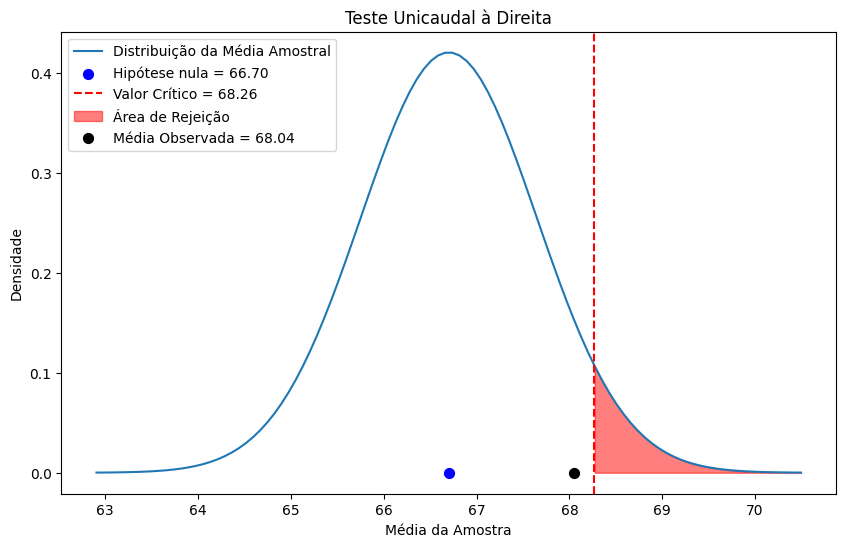

Não rejeitar H0: A média observada não é maior que o valor crítico.
Isso indica que não há evidência estatística suficiente para concluir que a média da população é maior que 66.7.


In [8]:
# Parâmetros
mu_0 = 66.7  # hipótese nula
sigma = 3    # desvio padrão da população
n = 10       # tamanho da amostra
alpha = 0.05 # nível de significância

# Gerar dados da amostra
np.random.seed(42)
sample = np.random.normal(mu_0, sigma, n)

# Média da amostra
sample_mean = np.mean(sample)

# Calculando o erro padrão
se = sigma / np.sqrt(n)

# Encontrar o valor crítico
z_critical = norm.ppf(1 - alpha)  # Valor z para alpha = 0.05
critical_value = mu_0 + z_critical * se

# Gerar valores para a linha x da distribuição normal
x = np.linspace(mu_0 - 4*se, mu_0 + 4*se, 100)
y = norm.pdf(x, mu_0, se)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição da Média Amostral')
plt.scatter(mu_0, 0, color='blue', s=50, label=f'Hipótese nula = {mu_0:.2f}')
plt.axvline(x=critical_value, color='red', linestyle='dashed', label=f'Valor Crítico = {critical_value:.2f}')
plt.fill_between(x, 0, norm.pdf(x, mu_0, se), where=(x > critical_value), color='red', alpha=0.5, label='Área de Rejeição')
plt.scatter(sample_mean, 0, color='black', s=50, label=f'Média Observada = {sample_mean:.2f}')
plt.title('Teste Unicaudal à Direita')
plt.xlabel('Média da Amostra')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Decisão com base no valor crítico
if sample_mean > critical_value:
    print("Rejeitar H0: A média observada é maior que o valor crítico.")
    print(f"Isso indica que há evidência estatística para concluir que a média da população é maior que {mu_0}.")
else:
    print("Não rejeitar H0: A média observada não é maior que o valor crítico.")
    print(f"Isso indica que não há evidência estatística suficiente para concluir que a média da população é maior que {mu_0}.")


### Teste Unicaudal à Direita
- **Valor Crítico ($K_\alpha$)**: Este é determinado como o quantil $1 - \alpha$ da distribuição estatística sob a hipótese nula. Este valor delimita o ponto além do qual se encontra a menor porção $\alpha$ da distribuição à direita.
- **Regra de Decisão**: Rejeite $H_0$ se a estatística de teste observada $T$ for maior que $K_\alpha$.

### Teste Unicaudal à Esquerda
- **Valor Crítico**: Para um teste à esquerda, o valor crítico é o quantil $\alpha$, que é o valor abaixo do qual se encontra a menor porção $\alpha$ da distribuição à esquerda.
- **Regra de Decisão**: Rejeite $H_0$ se a estatística de teste observada $T$ for menor que o valor crítico.

### Teste Bicaudal
- **Valores Críticos**: Em um teste bicaudal, como você está preocupado com desvios em qualquer direção, você precisa definir dois valores críticos:
  - $K_{\alpha_1}$: O quantil superior $1 - \alpha/2$, que é o valor além do qual se encontra a porção superior $\alpha/2$ da distribuição.
  - $K_{\alpha_2}$: O quantil inferior $\alpha/2$, que é o valor abaixo do qual se encontra a porção inferior $\alpha/2$ da distribuição.
- **Regra de Decisão**: Rejeite $H_0$ se a estatística de teste observada $T$ for maior que $K_{\alpha_1}$ ou menor que $K_{\alpha_2}$.


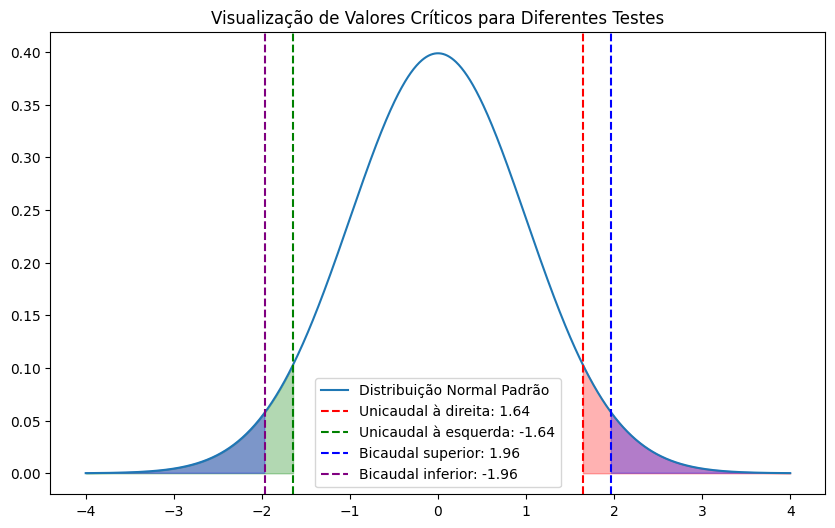

In [9]:
# Definir o nível de significância
alpha = 0.05

# Calcular valores críticos para cada tipo de teste
critical_value_right = norm.ppf(1 - alpha)
critical_value_left = norm.ppf(alpha)
critical_value_two_tailed_upper = norm.ppf(1 - alpha/2)
critical_value_two_tailed_lower = norm.ppf(alpha/2)

# Criar um gráfico
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal Padrão')
plt.axvline(critical_value_right, color='red', linestyle='--', label=f'Unicaudal à direita: {critical_value_right:.2f}')
plt.axvline(critical_value_left, color='green', linestyle='--', label=f'Unicaudal à esquerda: {critical_value_left:.2f}')
plt.axvline(critical_value_two_tailed_upper, color='blue', linestyle='--', label=f'Bicaudal superior: {critical_value_two_tailed_upper:.2f}')
plt.axvline(critical_value_two_tailed_lower, color='purple', linestyle='--', label=f'Bicaudal inferior: {critical_value_two_tailed_lower:.2f}')
plt.fill_between(x, y, 0, where=(x > critical_value_right), color='red', alpha=0.3)
plt.fill_between(x, y, 0, where=(x < critical_value_left), color='green', alpha=0.3)
plt.fill_between(x, y, 0, where=(x > critical_value_two_tailed_upper) | (x < critical_value_two_tailed_lower), color='blue', alpha=0.3)
plt.legend()
plt.title('Visualização de Valores Críticos para Diferentes Testes')
plt.show()

### Cenário
Consideramos que a média da altura de jovens de 18 anos nos EUA em 1970 era de 66.7 polegadas. Queremos testar se essa média aumentou. Usamos uma amostra de tamanho $ n = 10 $ com desvio padrão conhecido ($ \sigma = 3 $).

### Hipóteses
- **Hipótese Nula ($ H_0 $)**: A média da população é 66.7.
- **Hipótese Alternativa ($ H_1 $)**: A média da população é maior que 66.7.

### Cálculo da Probabilidade de Erro Tipo II ($ \beta $)
Suponha que o verdadeiro valor da média da população seja 70. Queremos calcular a probabilidade de não rejeitar $ H_0 $ dada essa verdade, ou seja, a probabilidade de que a média da amostra seja menor que o valor crítico de 68.26, mesmo sendo o verdadeiro valor 70.

#### Cálculos
- A média da amostra, quando $ \mu = 70 $, segue uma distribuição normal com média 70 e desvio padrão $ \frac{3}{\sqrt{10}} $.
- A probabilidade de que a média da amostra seja menor que 68.26 é calculada pela função de distribuição cumulativa normal para 68.26 com média 70 e o desvio padrão dado.

In [10]:
# Parâmetros
true_mu = 70
mu_0 = 66.7
sigma = 3
n = 10
critical_value = 68.26

# Cálculo da probabilidade de erro Tipo II
std_error = sigma / np.sqrt(n)
beta = norm.cdf(critical_value, loc=true_mu, scale=std_error)
power = 1 - beta

print(f'Probabilidade de erro Tipo II (beta) = {beta:.4f}')
print(f'Poder do teste (1 - beta) = {power:.4f}')

Probabilidade de erro Tipo II (beta) = 0.0333
Poder do teste (1 - beta) = 0.9667


### Visualização do Poder do Teste
Para visualizar o poder do teste para diferentes valores de $ \mu $ na hipótese alternativa:

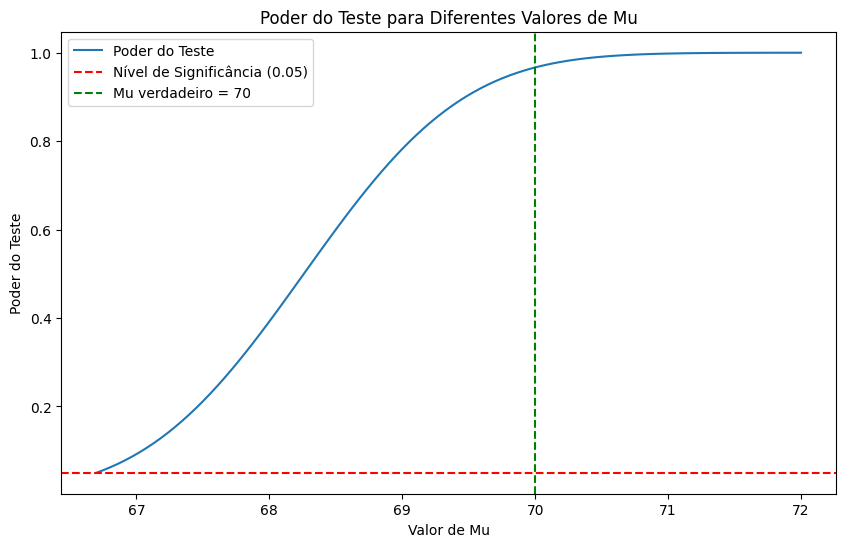

In [11]:
# Valores de mu para visualização
mus = np.linspace(66.7, 72, 100)
powers = 1 - norm.cdf(critical_value, loc=mus, scale=std_error)

plt.figure(figsize=(10, 6))
plt.plot(mus, powers, label='Poder do Teste')
plt.axhline(y=0.05, color='red', linestyle='--', label='Nível de Significância (0.05)')
plt.axvline(x=70, color='green', linestyle='--', label='Mu verdadeiro = 70')
plt.xlabel('Valor de Mu')
plt.ylabel('Poder do Teste')
plt.title('Poder do Teste para Diferentes Valores de Mu')
plt.legend()
plt.show()

Este exemplo ilustra como, à medida que $ \mu $ na hipótese alternativa aumenta, o poder do teste também aumenta, indicando maior probabilidade de rejeitar corretamente $ H_0 $ quando ela é falsa. A função do poder do teste é crucial para entender como diferentes valores de $ \mu $ afetam a capacidade do teste de detectar diferenças verdadeiras da hipótese nula.

### Etapas no Teste de Hipóteses

1. **Definir Suas Hipóteses**
   - **Hipótese Nula ($H_0$)**: Esta é a suposição padrão. Por exemplo, $H_0$ poderia ser que a média da altura da população é de 66.7 polegadas.
   - **Hipótese Alternativa ($H_1$)**: É o que você pretende provar. No nosso exemplo, poderia ser que a média da altura da população é maior que 66.7 polegadas.

2. **Desenhar o Teste**
   - Selecionar a estatística de teste apropriada (por exemplo, a média da amostra).
   - Definir o nível de significância ($\alpha$), comumente estabelecido em 0.05, representando a probabilidade máxima de cometer um Erro Tipo I.

3. **Calcular a Estatística Observada**
   - Calcular a estatística a partir dos seus dados de amostra. Por exemplo, uma média de amostra observada pode ser 68.442.

4. **Tomada de Decisão**
   - Comparar o p-valor com $\alpha$. Se o p-valor for menor que $\alpha$, rejeite $H_0$ e aceite $H_1$.

### Compreendendo Erros e Equívocos

- **Erro Tipo I**: Ocorre quando $H_0$ é verdadeira, mas você a rejeita incorretamente. A probabilidade de um Erro Tipo I é $\alpha$.
- **Erro Tipo II**: Ocorre quando $H_1$ é verdadeira, mas você falha em rejeitar $H_0$. Esta probabilidade é denotada como $\beta$.

### Equívocos Sobre P-valores e Teste de Hipóteses

- **P-valores**: 
  - **Entendimento Comum Equivocado**: P-valores indicam a probabilidade de que $H_0$ seja verdadeira.
  - **Realidade**: P-valores representam a probabilidade de observar dados tão extremos quanto os dados da amostra, assumindo que $H_0$ seja verdadeira. Eles não medem a verdade de $H_0$ em si.

- **Interpretação das Conclusões do Teste**:
  - **Se você rejeitar $H_0$**: Isso não prova que $H_1$ é verdadeira; apenas sugere que $H_0$ é improvável dado os dados observados.
  - **Se você não rejeitar $H_0$**: Isso não confirma que $H_0$ é verdadeira; apenas indica que não há evidência suficiente contra $H_0$ com base nos dados e no $\alpha$ escolhido.

### Tomada de Decisão Usando Valores Críticos e P-valores

Tanto os valores críticos quanto os p-valores são ferramentas para tomar decisões em testes de hipóteses:

- **Abordagem de Valor Crítico**: Envolve comparar a estatística observada com um limiar. Se a estatística exceder o valor crítico (em um teste unicaudal à direita), $H_0$ é rejeitada.
- **Abordagem de P-valor**: Compara o p-valor com $\alpha$. Se o p-valor for menor, $H_0$ é rejeitada.

### Contexto do Problema
Suponha que estamos amostrando a altura de 10 jovens de 18 anos. Se conhecêssemos $\mu$ (média da população) e $\sigma$ (desvio padrão da população), poderíamos usar a distribuição normal padrão para testes de hipóteses usando a estatística Z:

$$ Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} $$

onde $\bar{X}$ é a média da amostra e $n$ é o tamanho da amostra.

### Quando $\sigma$ é Desconhecido
Na realidade, muitas vezes não conhecemos $\sigma$. Nesse caso, substituímos $\sigma$ por $S$, o desvio padrão amostral:

$$ S = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2} $$

Essa substituição muda a distribuição da nossa estatística de teste. Em vez de seguir uma distribuição normal padrão, a nova estatística de teste, chamada de estatística t, segue a distribuição t de Student:

$$ T = \frac{\bar{X} - \mu}{S/\sqrt{n}} $$

### Propriedades da Distribuição t de Student
A distribuição t tem a forma de sino como a distribuição normal, mas com caudas mais pesadas. Essas caudas mais pesadas são importantes porque representam maior incerteza na estimativa de $\sigma$, e portanto proporcionam um teste mais conservador, que é menos propenso a rejeitar a hipótese nula incorretamente quando $\sigma$ é desconhecido.

#### Graus de Liberdade
Os graus de liberdade da distribuição t de Student ($\nu$) são definidos como $n-1$, onde $n$ é o tamanho da amostra. Os graus de liberdade afetam a forma da distribuição:

- Quanto menor o número de graus de liberdade, mais pesadas são as caudas da distribuição t.
- À medida que os graus de liberdade aumentam, a distribuição t converge para a distribuição normal.



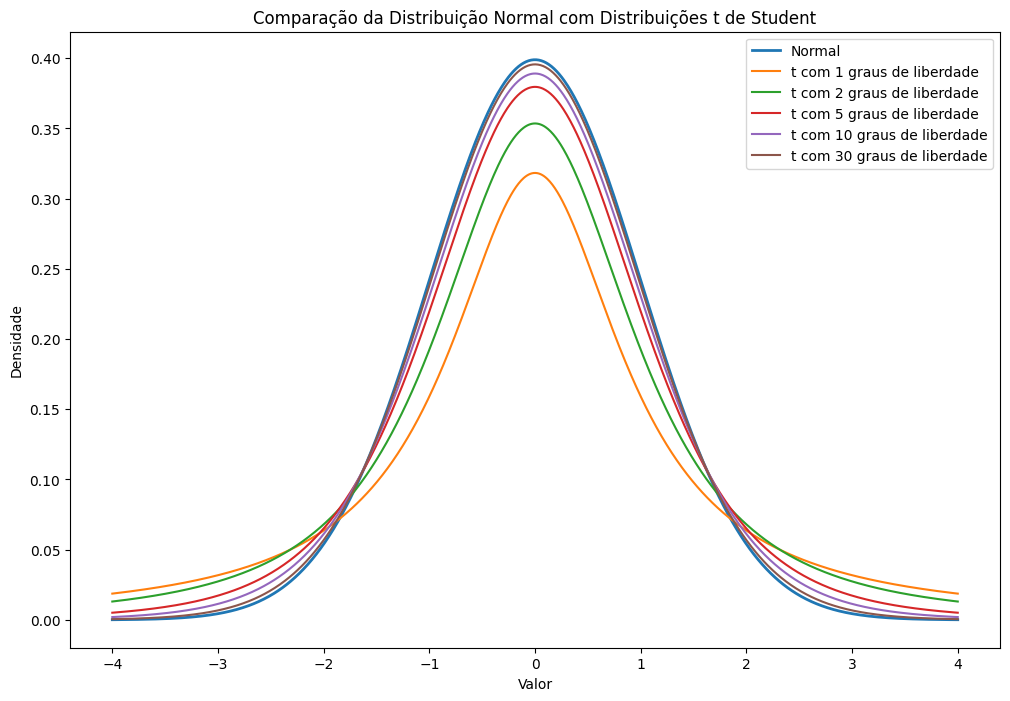

In [12]:
# Valores de x para plotar as distribuições
x = np.linspace(-4, 4, 1000)

# Plotar distribuição normal e várias distribuições t
plt.figure(figsize=(12, 8))
plt.plot(x, norm.pdf(x), label='Normal', linewidth=2)
for df in [1, 2, 5, 10, 30]:
    plt.plot(x, t.pdf(x, df), label=f't com {df} graus de liberdade')

plt.title('Comparação da Distribuição Normal com Distribuições t de Student')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.show()


### Parâmetros Iniciais
- Tamanho da amostra ($n$): 10
- Média da amostra ($\bar{x}$): 68.442
- Desvio padrão amostral ($s$): 3.113
- Hipótese nula ($H_0$): média populacional ($\mu$) é 66.7

### Cálculo da Estatística t
A estatística t é calculada como:
$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$

Para o nosso caso:
$$ t = \frac{68.442 - 66.7}{3.113/\sqrt{10}} \approx 1.771 $$

### Teste Unicaudal à Direita
- **Valor p**: Probabilidade de que a estatística t seja maior que 1.771 sob $H_0$.
- **Cálculo**: $ p = P(T > 1.771) = 0.0552 $
- **Decisão**: Como $ p > 0.05 $, não rejeitamos $H_0$.

### Teste Bicaudal
- **Valor p**: Probabilidade de que o valor absoluto da estatística t seja maior que 1.771.
- **Cálculo**: $ p = P(|T| > 1.771) = 0.1103 $
- **Decisão**: Como $ p > 0.05 $, não rejeitamos $H_0$.

### Teste Unicaudal à Esquerda
Considerando agora uma média de amostra hipotética de 64.252 com o mesmo desvio padrão:
- **Estimativa t**: $ t = \frac{64.252 - 66.7}{3.113/\sqrt{10}} \approx -2.487 $
- **Valor p**: Probabilidade de que a estatística t seja menor que -2.487 sob $H_0$.
- **Cálculo**: $ p = P(T < -2.487) = 0.0173 $
- **Decisão**: Como $ p < 0.05 $, rejeitamos $H_0$ e aceitamos a hipótese de que a média da população diminuiu.

### Conclusões
- **Incerteza sobre $\sigma$** aumenta a variabilidade na distribuição da média da amostra, levando a uma estatística t com caudas mais pesadas, o que pode afetar significativamente as decisões de teste de hipótese.
- **Decisões baseadas no valor p** ajudam a determinar se a evidência é suficiente para rejeitar a hipótese nula sob o nível de significância escolhido.


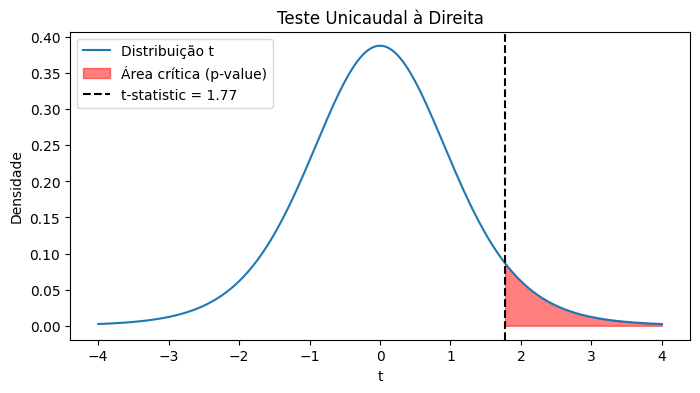

Teste Unicaudal à Direita: p-value = 0.0553
Não rejeitar H0: Não há evidências significativas de que a média seja maior que 66.7


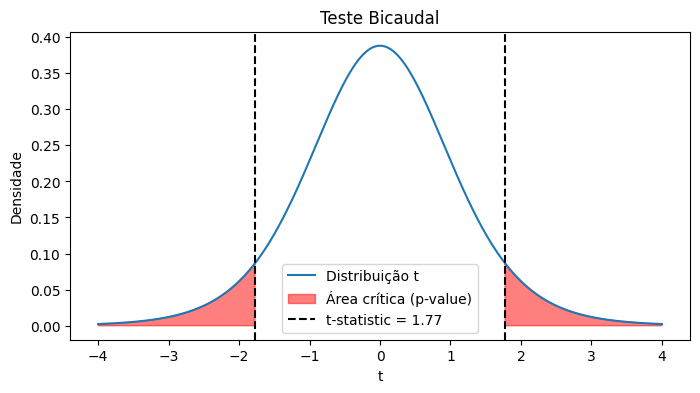

Teste Bicaudal: p-value = 0.1106
Não rejeitar H0: Não há evidências significativas de que a média seja diferente de 66.7


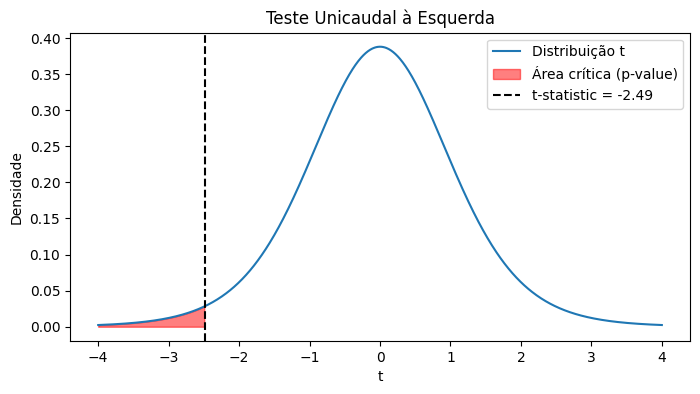

Teste Unicaudal à Esquerda: p-value = 0.0173
Rejeitar H0: A média é significativamente menor que 66.7


In [21]:
# Parâmetros iniciais
n = 10
sample_mean = 68.442
s = 3.113
mu_0 = 66.7

# Cálculo da estatística t
t_statistic = (sample_mean - mu_0) / (s / np.sqrt(n))
df = n - 1

# Teste unicaudal à direita
p_value_right = 1 - t.cdf(t_statistic, df)

# Gráfico para o teste unicaudal à direita
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Distribuição t')
plt.fill_between(x, 0, y, where=(x >= t_statistic), color='red', alpha=0.5, label='Área crítica (p-value)')
plt.axvline(t_statistic, color='black', linestyle='dashed', label=f't-statistic = {t_statistic:.2f}')
plt.title('Teste Unicaudal à Direita')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.show()

print(f"Teste Unicaudal à Direita: p-value = {p_value_right:.4f}")
if p_value_right < alpha:
    print("Rejeitar H0: A média é significativamente maior que 66.7")
else:
    print("Não rejeitar H0: Não há evidências significativas de que a média seja maior que 66.7")

# Teste bicaudal
p_value_two_tailed = 2 * (1 - t.cdf(abs(t_statistic), df))

# Gráfico para o teste bicaudal
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Distribuição t')
plt.fill_between(x, 0, y, where=(x >= abs(t_statistic)) | (x <= -abs(t_statistic)), color='red', alpha=0.5, label='Área crítica (p-value)')
plt.axvline(t_statistic, color='black', linestyle='dashed', label=f't-statistic = {t_statistic:.2f}')
plt.axvline(-t_statistic, color='black', linestyle='dashed')
plt.title('Teste Bicaudal')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.show()

print(f"Teste Bicaudal: p-value = {p_value_two_tailed:.4f}")
if p_value_two_tailed < alpha:
    print("Rejeitar H0: A média é significativamente diferente de 66.7")
else:
    print("Não rejeitar H0: Não há evidências significativas de que a média seja diferente de 66.7")

# Teste unicaudal à esquerda (hipotética nova média)
new_sample_mean = 64.252
t_statistic_left = (new_sample_mean - mu_0) / (s / np.sqrt(n))
p_value_left = t.cdf(t_statistic_left, df)

# Gráfico para o teste unicaudal à esquerda
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Distribuição t')
plt.fill_between(x, 0, y, where=(x <= t_statistic_left), color='red', alpha=0.5, label='Área crítica (p-value)')
plt.axvline(t_statistic_left, color='black', linestyle='dashed', label=f't-statistic = {t_statistic_left:.2f}')
plt.title('Teste Unicaudal à Esquerda')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.show()

print(f"Teste Unicaudal à Esquerda: p-value = {p_value_left:.4f}")
if p_value_left < alpha:
    print("Rejeitar H0: A média é significativamente menor que 66.7")
else:
    print("Não rejeitar H0: Não há evidências significativas de que a média seja menor que 66.7")

No cenário onde você está interessado em comparar as médias de duas populações diferentes, como as alturas de jovens de 18 anos nos EUA versus Argentina, você utilizaria o teste de hipóteses para duas amostras. Esse tipo de teste permite determinar se existe uma diferença estatisticamente significativa entre as médias desses dois grupos com base em seus dados amostrais.

### Etapas para o Teste de Hipóteses para Duas Amostras

1. **Definir suas Hipóteses**:
   - **Hipótese Nula (H0)**: As médias populacionais dos dois grupos são iguais ($ \mu_{EUA} = \mu_{Argentina} $).
   - **Hipótese Alternativa (H1)**: Dependendo da natureza da sua investigação, pode ser:
     - $ \mu_{EUA} > \mu_{Argentina} $ (Teste unilateral à direita)
     - $ \mu_{EUA} < \mu_{Argentina} $ (Teste unilateral à esquerda)
     - $ \mu_{EUA} \neq \mu_{Argentina} $ (Teste bilateral)

2. **Coletar Dados**:
   - Você coletou dados de ambos os grupos. Para os EUA, a média amostral é 68,442 polegadas com um desvio padrão de 3,113. Para a Argentina, a média amostral é 65,949 polegadas com um desvio padrão de 3,106.

3. **Assunções**:
   - Independência dentro e entre grupos.
   - Distribuição normal das populações.
   - Variâncias populacionais iguais ou desiguais (isso afeta o tipo de teste t que você usa).

4. **Escolher o Teste Apropriado**:
   - Para variâncias iguais, você pode usar um teste t agrupado.
   - Para variâncias desiguais, o teste t de Welch é mais apropriado devido ao seu ajuste para diferentes desvios padrões e tamanhos de amostras.

5. **Calcular a Estatística de Teste**:
   - Para o teste t de Welch, a estatística é calculada como:
   $$
   t = \frac{\bar{x}_{EUA} - \bar{y}_{Argentina}}{\sqrt{\frac{s_{EUA}^2}{n_{EUA}} + \frac{s_{Argentina}^2}{n_{Argentina}}}}
   $$
   onde $ \bar{x} $ e $ \bar{y} $ são as médias amostrais, $ s^2 $ são as variâncias amostrais e $ n $ são os tamanhos das amostras.

6. **Determinar o valor-p**:
   - O valor-p ajudará a determinar a significância estatística das diferenças observadas com base no nível alfa escolhido (comumente 0,05).

7. **Tomar uma Decisão**:
   - Se o valor-p for menor que o nível alfa, você rejeita a hipótese nula, sugerindo uma diferença significativa entre as médias dos grupos.
   - Se o valor-p for maior ou igual ao nível alfa, você não rejeita a hipótese nula, sugerindo que não há diferença significativa entre os grupos.


In [26]:
# Dados de amostra
alturas_eua = np.array([68.442] * 10 + [3.113] * 10)  # Amostra simplificada
alturas_argentina = np.array([65.949] * 9 + [3.106] * 9)  # Amostra simplificada

# Teste t para duas amostras
t_stat, p_value = ttest_ind(alturas_eua, alturas_argentina, equal_var=False)

# Resultados de saída
print(f"Estatística t: {t_stat:.2f}, valor-p: {p_value:.4f}")
if p_value < 0.05:
    print("Rejeitar a hipótese nula: Diferença significativa entre os grupos.")
else:
    print("Não rejeitar a hipótese nula: Não há diferença significativa entre os grupos.")

Estatística t: 0.12, valor-p: 0.9076
Não rejeitar a hipótese nula: Não há diferença significativa entre os grupos.


Ao comparar duas médias populacionais de populações normalmente distribuídas, mas com desvios padrões desconhecidos, o teste de hipótese ajusta-se para acomodar a incerteza adicional.
### Configuração do Problema:
- **Grupo dos EUA**: n₁ = 10, média₁ (x̄) = 68,442 polegadas, desvio padrão₁ (s₁) = 3,113
- **Grupo da Argentina**: n₂ = 9, média₂ (ȳ) = 65,949 polegadas, desvio padrão₂ (s₂) = 3,106
- **Hipótese Nula (H₀)**: µ₁ - µ₂ = 0 (Não há diferença entre as médias populacionais)
- **Hipótese Alternativa (H₁)**: µ₁ - µ₂ > 0 (A média dos EUA é maior que a da Argentina para o teste unicaudal à direita)

### Método Estatístico:
- A estatística usada para comparar as médias é a diferença entre as médias das amostras. Dada a desconhecimento dos desvios padrões populacionais, usamos o desvio padrão agrupado sob a suposição de homogeneidade de variância:
  
  $$ SE = \sqrt{\frac{s₁²}{n₁} + \frac{s₂²}{n₂}} $$
  
- Isso leva a uma estatística t:

  $$ t = \frac{(x̄ - ȳ) - 0}{SE} $$
  
- Os graus de liberdade para esta distribuição t podem ser aproximados usando a equação de Welch-Satterthwaite, que frequentemente simplifica para o menor tamanho da amostra menos um, mas pode ser mais complexo dependendo das variâncias e tamanhos das amostras. Neste cenário, os graus de liberdade são calculados como 16,8.

### Cálculo da Estatística t:
- Substituindo os números:

  $$ t = \frac{(68,442 - 65,949)}{\sqrt{\frac{3,113²}{10} + \frac{3,106²}{9}}} \approx 1,7459 $$

### Tomada de Decisão:
- **Teste Unicaudal à Direita**: O valor-p é a probabilidade de que t seja maior que 1,7459 sob H₀. Para uma distribuição t com 16,8 graus de liberdade, isso é calculado como:

  $$ valor-p = P(T > 1,7459) \approx 0,0495 $$
  
  Como o valor-p (0,0495) é menor que o nível de significância (α = 0,05), você rejeita H₀, sugerindo que a média populacional da altura dos jovens de 18 anos nos EUA é estatisticamente significativamente maior que a da Argentina.

- **Teste Bicaudal**: Você também deseja calcular a probabilidade de que o valor absoluto de t exceda 1,7459:

  $$ valor-p = 2 \times P(|T| > 1,7459) = 0,0991 $$

  Para um teste bicaudal com α = 0,05, o valor-p é maior que o nível de significância, o que significa que você não tem evidência suficiente para rejeitar H₀, sugerindo que não há evidências suficientes para afirmar que as médias populacionais são diferentes.

Agora, vamos explorar uma situação onde as duas amostras não são independentes, como no caso de um teste para avaliar a eficácia de um programa de treinamento para perda de peso.

### Configuração do Problema:
Imagine que você tem um grupo de pessoas antes de começarem um programa de treinamento e o mesmo grupo após quatro semanas de treinamento. Aqui, as amostras são emparelhadas: cada participante é pesado antes e depois do programa, criando pares de dados para cada indivíduo.

### Definindo as Variáveis:
- **Xᵢ**: Peso do i-ésimo participante antes do programa.
- **Yᵢ**: Peso do i-ésimo participante após o programa.
- **Dᵢ = Xᵢ - Yᵢ**: Diferença de peso para o i-ésimo participante.

Essas diferenças, $Dᵢ$, formam uma nova amostra que será usada para testar a eficácia do programa. A média dessas diferenças, $\bar{D}$, informará se houve uma mudança significativa no peso médio dos participantes.

### Pressupostos Estatísticos:
Se $X$ e $Y$ provêm de populações gaussianas, então $D$ também é gaussiano. No entanto, como o desvio padrão da população é desconhecido, substituímos pelo desvio padrão da amostra, levando à estatística t, que segue uma distribuição t com $n-1$ graus de liberdade, onde $n$ é o número de pares.

### Estatísticas Observadas:
- **Média da amostra ($\bar{D}$)**: 1,09 (média das diferenças)
- **Desvio padrão da amostra (s)**: 1,485
- **Estatística t observada**: 
  $$
  t = \frac{\bar{D} - 0}{s/\sqrt{n}} = \frac{1.09 - 0}{1.485/\sqrt{10}} \approx 2.321
  $$

### Hipóteses:
- **Hipótese Nula (H₀)**: $\mu_D = 0$ (Não há diferença de peso médio)
- **Hipótese Alternativa (H₁)**: $\mu_D > 0$ (O programa leva à perda de peso)

### Teste de Hipóteses:
Este é um teste unicaudal à direita, pois estamos testando se o programa de treinamento resultou em uma perda de peso (aumento negativo).

### Valor-p:
O valor-p para este teste é a probabilidade de obter uma estatística t maior que 2.321 sob a hipótese nula. Isso é calculado como:
$$ \text{valor-p} = P(T > 2.321) $$
O valor-p calculado de 0.0227 é menor que o nível de significância de 0.05, portanto rejeitamos $H₀$, concluindo que o programa de treinamento é eficaz na redução do peso.


In [28]:
# Dados simulados: pesos antes e depois do programa de treinamento
pesos_antes = np.array([200, 205, 198, 190, 220, 210, 205, 198, 215, 200])
pesos_depois = np.array([195, 200, 190, 185, 210, 205, 200, 190, 210, 195])

# Diferença dos pesos (D = antes - depois)
diferencas = pesos_antes - pesos_depois

# Estatísticas descritivas
media_diferencas = np.mean(diferencas)
std_diferencas = np.std(diferencas, ddof=1)
n = len(diferencas)

# Estatística t calculada
t_statistic = media_diferencas / (std_diferencas / np.sqrt(n))

# Graus de liberdade
df = n - 1

# Valor-p para o teste unicaudal à direita
p_value = 1 - t.cdf(t_statistic, df)

# Exibindo os resultados
print(f"Média das diferenças: {media_diferencas:.2f}")
print(f"Desvio padrão das diferenças: {std_diferencas:.2f}")
print(f"Estatística t: {t_statistic:.2f}")
print(f"Valor-p: {p_value:.4f}")

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: O programa de treinamento é eficaz na redução do peso.")
else:
    print("Não rejeitar H0: Não há evidências suficientes de que o programa seja eficaz.")


Média das diferenças: 6.10
Desvio padrão das diferenças: 1.85
Estatística t: 10.41
Valor-p: 0.0000
Rejeitar H0: O programa de treinamento é eficaz na redução do peso.
